In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neural_network import MLPClassifier

In [14]:
df = pd.read_csv('exams.csv')

## Encoding

In [15]:
labels = ['fail','pass']
bins = [0,55,101]
df['average score'] = (df['math score'] + df['writing score']+df['reading score'])/3
df['math score'] = pd.cut(df['math score'],bins = bins, labels = labels, include_lowest = True)
df['reading score'] = pd.cut(df['reading score'],bins = bins, labels = labels, include_lowest = True)
df['writing score'] = pd.cut(df['writing score'],bins = bins, labels = labels, include_lowest = True)
df['average score'] = pd.cut(df['average score'],bins = bins, labels = labels, include_lowest = True)


Multilayer preceptron requires the input variables to be continous. Therefore the factors are transformed into one hot encoders to represent the discrete data. It also requires the dependent variables to be discrete. As such, the scores are put into bins similar to the Naive Bayes model

In [16]:
onehot_encoder = OneHotEncoder()
data = onehot_encoder.fit_transform(df[["gender","race/ethnicity",'parental level of education','lunch','test preparation course']]).toarray()
lables = onehot_encoder.categories_
lables = np.array(lables,dtype=object).ravel()
lables = np.hstack(lables)
le = preprocessing.LabelEncoder()
for col in df.columns:
        df[col] = le.fit_transform(df[col])
        
factors = pd.DataFrame(data, columns = lables)
target = df.iloc[:,5:9]

## Testing and Training

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
   factors, target, test_size = 0.3, random_state = 1
)


In [18]:
mlp = MLPClassifier(random_state = 10, max_iter = 5000, activation = 'relu',hidden_layer_sizes = (3,2),alpha = 0.0001)
mlp1 = mlp.fit(X_train, y_train['average score'])
y_pred_average = mlp.predict(X_test)

In [19]:
print("Training set score: {:.3f}".format(mlp1.score(X_train,y_train['average score'])))
print("Test set score: {:.3f}".format(mlp1.score(X_test,y_test['average score'])))

Training set score: 0.830
Test set score: 0.790


## Evaluation

In [20]:
confusion_matrix(y_test['average score'], y_pred_average,labels=None, sample_weight=None, normalize=None)

array([[  8,  56],
       [  7, 229]], dtype=int64)

Logistic regression classifier has tp value of 8, fp of 7, fn of 56 and tn of 229

In [21]:
print(classification_report(y_test['average score'], y_pred_average))

              precision    recall  f1-score   support

           0       0.53      0.12      0.20        64
           1       0.80      0.97      0.88       236

    accuracy                           0.79       300
   macro avg       0.67      0.55      0.54       300
weighted avg       0.75      0.79      0.73       300



Precision score of 0.80, recall 0.97, and a f1 score of 0.88

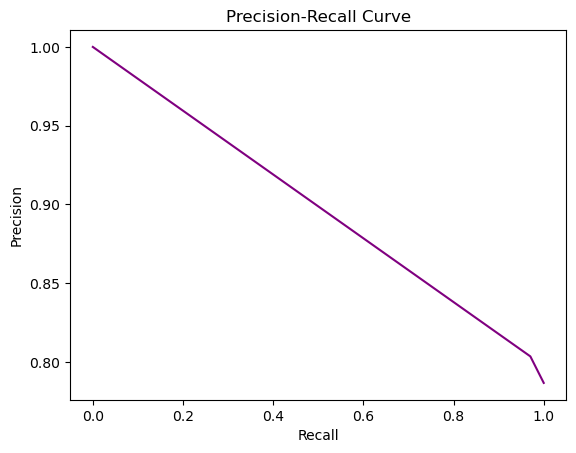

In [22]:
precision, recall, thresholds = precision_recall_curve(y_test['average score'], y_pred_average)
fig, ax = plt.subplots()
ax.plot(recall, precision, color= 'purple')
ax.set_title('Precision-Recall Curve')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')
plt.show()

In [12]:
print(y_test['average score'])


507    fail
818    pass
452    pass
368    pass
242    pass
       ... 
459    pass
415    pass
61     pass
347    pass
349    pass
Name: average score, Length: 300, dtype: category
Categories (2, object): ['fail' < 'pass']
